In [1]:
import gensim
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import warnings 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from sklearn.cluster import Birch 
from sklearn.cluster import DBSCAN
import os
warnings.filterwarnings(action = 'ignore') 

In [2]:
currentdir = os.getcwd()
def datadir(file):
    return currentdir+'/'+file
datadir('')

'/Users/shunling/Desktop/CapstoneProjects/NaturalLanguageProcessingGPCR/'

In [3]:
class callback(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0
        self.loss_s = 0
        
    def on_epoch_end(self,model):
            
        if self.epoch % 1 == 0:
            loss_e = int(model.get_latest_training_loss())
            loss = loss_e - self.loss_s
            self.loss_s = loss_e
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        self.epoch += 1 

In [4]:
model = Word2Vec.load('Models/m300_50_5_5.model')
vocab = model.wv.vocab.keys()
word_vecs = [model.wv[word] for word in vocab]

In [5]:
from datetime import datetime

from scipy.spatial import distance
import numpy as np
import pandas as pd

In [6]:
# Using the documentation for the `silhouette_score` function above, 
# construct a series of silhouette plots like the ones in the article linked above.
from sklearn.metrics import silhouette_score
SSE = []
K = range(10,50,5)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    
    score = silhouette_score(word_vecs, kmeanModel.fit_predict(word_vecs))
    print(datetime.now(),': ',score)
    SSE.append(score)

2019-11-04 15:44:42.722296 :  0.026670044
2019-11-04 17:28:56.396974 :  0.02801668
2019-11-04 18:01:31.751550 :  0.028978229
2019-11-04 18:35:11.205471 :  0.029265454
2019-11-04 19:11:05.824285 :  0.030010302
2019-11-04 19:52:22.570462 :  0.031986773
2019-11-04 20:29:44.552433 :  0.031823047
2019-11-04 21:07:59.560140 :  0.031575613


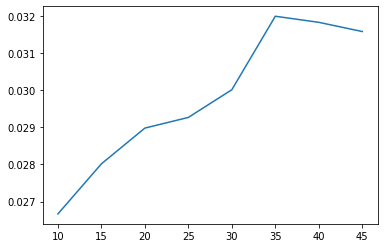

In [10]:
import matplotlib.pyplot as plt

plt.plot(K,SSE)
plt.savefig('silhouette.png')

In [5]:
# 20 clusters
%%time
n_cluster = 20
km_cluster = KMeans(n_clusters=n_cluster).fit(word_vecs)
d = distance.cdist(word_vecs,km_cluster.cluster_centers_,metric='euclidean')
SS = np.sum(np.min(d,axis=1))/len(word_vecs)
print('kMeans done, loss = {:.3}'.format(SS))
print(datetime.now())

km_labels = km_cluster.labels_

kMeans done, loss = 3.22
2019-10-28 12:33:35.551351


In [11]:
df = pd.DataFrame(word_vecs,columns = [i for i in range(300)])

In [15]:
df.index = vocab

In [17]:
df['label'] = km_labels

In [ ]:
df.to_csv('word_class20.csv')

In [21]:
# 35 clusters

In [12]:
%%time
n_cluster = 35
km_cluster = KMeans(n_clusters=n_cluster).fit(word_vecs)
d = distance.cdist(word_vecs,km_cluster.cluster_centers_,metric='euclidean')
SS = np.sum(np.min(d,axis=1))/len(word_vecs)
print('kMeans done, loss = {:.3}'.format(SS))

kMeans done, loss = 3.15


NameError: name 'df' is not defined

In [22]:

df35 = pd.DataFrame(word_vecs,columns = [i for i in range(300)])
df35.index = vocab
df35['label'] = km_cluster.labels_
df35['label'].to_csv('word_class35.csv')
df35.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,label
what,0.112631,-0.027567,0.389141,-0.106166,-0.036858,0.174021,0.183803,0.082252,0.007311,-0.336434,...,-0.044195,-0.256803,-0.103212,0.168220,-0.013151,-0.305558,-0.002310,0.084851,-0.058029,4
we,0.256392,0.059434,0.071496,0.042644,-0.044782,-0.123316,0.084929,-0.120551,-0.134421,-0.061319,...,0.024443,-0.089100,-0.016137,0.119141,0.007926,-0.089660,-0.041727,-0.091241,-0.003752,32
know,0.155820,0.021244,0.045042,-0.004687,-0.103851,-0.074655,0.114026,-0.137674,-0.139760,-0.006807,...,0.050255,-0.182831,-0.040470,0.144936,-0.015766,-0.177883,-0.042206,-0.042344,0.024171,32
and,0.169945,0.009516,0.049934,0.196669,-0.140271,-0.025416,0.145185,-0.058401,-0.144195,-0.139730,...,0.030937,-0.046990,0.105125,0.130561,0.137056,0.097826,0.131815,0.038892,0.038345,32
do_not,0.180850,-0.057114,0.159603,0.092293,-0.113717,-0.077967,0.072090,-0.058054,-0.207193,-0.110683,...,0.119232,-0.166349,0.018261,0.066868,0.117246,-0.171014,0.139693,0.050467,-0.002439,32


### playground for 20 clusters

In [3]:
import pandas as pd
df = pd.read_csv('word_class20.csv')

In [23]:
for c in range(20):
    print(c, ': ',len(df.loc[df['class'] == c]))

0 :  7856
1 :  14167
2 :  11109
3 :  10735
4 :  16233
5 :  14158
6 :  13030
7 :  5435
8 :  8505
9 :  16897
10 :  10966
11 :  8707
12 :  11801
13 :  13394
14 :  9625
15 :  15752
16 :  14649
17 :  11683
18 :  18009
19 :  14790


In [6]:
df.shape, df.head()

((247501, 2),          what  9
 0          we  4
 1        know  4
 2         and  4
 3      do_not  4
 4  know_about  9)

In [7]:
df.columns = ['word','class']

In [10]:
df.loc[df['class'] == 0].head(20) # inflammation

,word,class
150,bile_acid,0
158,bile_flow,0
171,bile_acid_bas,0
174,bas,0
219,gpr39,0
246,39_gpr39,0
442,gpr109a,0
451,beta_hydroxybutyrate,0
456,ketone_body,0
458,an_important_energy_source,0


In [11]:
df.loc[df['class'] == 1].head(20) # cancer

,word,class
26,hematopoietic,1
248,hypermethylate,1
374,gpr56,1
376,proliferation,1
377,colorectal_cancer,1
379,metastasis,1
380,epithelialmesenchymal_transition,1
381,pi3k_akt_signal,1
382,g_proteincoupled,1
383,56_gpr56,1


In [12]:
df.loc[df['class'] == 2].head(20) # biased siangling

,word,class
81,allosteric,2
113,orthosteric_site,2
121,allosteric_ligand,2
123,topographically_distinct_site,2
128,orthosteric_ligand,2
307,key_step,2
371,slow_off_rate,2
588,pharmacophore_base_virtual_screening,2
590,virtual_screening,2
594,rational_drug_design,2


In [13]:
df.loc[df['class'] == 3].head(20) # structure

,word,class
83,7tm,3
92,seven_transmembrane_7tm_g_protein_couple,3
109,domain,3
189,gpcrs,3
263,dark,3
298,simulation,3
305,unbind,3
314,allosteric_communication_between,3
324,computational_method,3
325,metadynamic,3


In [14]:
df.loc[df['class'] == 4].head(20) # no-use

,word,class
0,we,4
1,know,4
2,and,4
3,do_not,4
5,the,4
7,receptor,4
8,2,4
10,it,4
11,have,4
12,be,4


In [16]:
df.loc[df['class'] == 5].head(20) # neuroscience

,word,class
162,intense,5
184,sensory_neuron,5
207,neuron,5
255,metabotropic,5
256,excitatory,5
257,inhibitory_neurotransmission,5
292,glutamate_release,5
352,network,5
403,immunohistochemistry,5
472,retina,5


In [18]:
df.loc[df['class'] == 6].head(20) # signaling

,word,class
149,g_protein_couple,6
253,zn_2,6
294,together_our_finding_suggest_that,6
306,heterotrimeric_g_protein,6
309,signaling_cascade,6
339,rate_limit_step,6
344,translation,6
431,overexpression,6
558,here_we_show_that,6
657,decoy,6


In [19]:
df.loc[df['class'] == 7].head(20) # no-use

,word,class
409,tumor,7
877,intensity_histogram,7
881,image,7
1000,tumour,7
1742,111,7
2399,sst2,7
2661,carcinoid_tumor,7
2667,imaging,7
2674,bronchopulmonary_carcinoid,7
2679,125ityr10,7


In [24]:
df.loc[df['class'] == 8].head(20) # hormone

,word,class
415,cycle,8
1042,steroid_hormone,8
1090,kisspeptin,8
1091,pregnancy,8
1098,kiss1,8
1101,metastin,8
1104,inactivate_mutation,8
1105,gpr54_kiss1r,8
1108,puberty,8
1111,kisspeptin_kiss1r_system,8


In [25]:
df.loc[df['class'] == 9].head(20) # no use

,word,class
4,know_about,9
13,well_appreciate,9
15,endocannabinoid_system,9
34,endocannabinoid,9
38,plant_derive,9
39,synthetic_cannabinoid,9
50,biological_process,9
58,greatly_expand,9
59,our_knowledge,9
60,how,9


In [26]:
df.loc[df['class'] == 10].head(20) # genetics

,word,class
88,genome,10
91,encode,10
187,an_orphan_member,10
196,ortholog,10
247,gene,10
363,foundation_for_understand,10
385,orphan_gpcr,10
465,hitherto_unknown,10
489,rmc1,10
608,module,10


In [27]:
df.loc[df['class'] == 11].head(20) # pharma

,word,class
103,prescribe,11
152,cholestatic_pruritus,11
161,experience,11
168,patient,11
180,therapy,11
328,card,11
444,hm74a,11
450,niacin,11
740,oral,11
866,pharmacodynamic,11


In [28]:
df.loc[df['class'] == 12].head(20) # immune

,word,class
18,immune_response,12
62,immune,12
78,immune_system,12
169,sera,12
186,x4,12
202,humanized_mouse,12
244,rhesus_macaque,12
252,macaque,12
443,puma_g,12
520,pathogen,12


In [29]:
df.loc[df['class'] == 13].head(20) # no-use

,word,class
19,via,13
178,ba,13
179,modulating,13
269,without_affect,13
283,wash_out,13
299,spontaneous,13
311,mechanism,13
340,release,13
356,distal,13
397,crc,13


In [30]:
df.loc[df['class'] == 14].head(20) # pain

,word,class
6,cannabinoid,14
9,cb2,14
154,cholestasis,14
163,chronic_itch,14
165,pruritogen,14
167,cholestatic,14
173,injection,14
176,itch,14
195,mrgpr,14
209,scratch,14


In [31]:
df.loc[df['class'] == 15].head(20) # not-obvious

,word,class
151,may_contribute,15
249,downregulate,15
285,during,15
296,prevention,15
342,tilt,15
453,hb,15
457,circulation,15
467,circulate,15
468,diabete,15
507,conclusion_these_datum,15


In [33]:
df.loc[df['class'] == 16].head(20) # genetic

,word,class
69,genetic,16
148,mrgprx4,16
230,socioeconomic,16
235,aud,16
242,dna_methylome,16
250,heavy_alcohol,16
544,healthy,16
629,weighted,16
654,dud,16
703,psychophysically,16


In [34]:
df.loc[df['class'] == 17].head(20) # signaling

,word,class
55,generation,17
132,activate,17
155,slowing,17
200,activation,17
357,nucleotide,17
367,slow,17
427,depletion,17
498,polarize,17
499,basolateral_membrane,17
589,application,17


In [35]:
df.loc[df['class'] == 18].head(20) # drug

,word,class
98,drug,18
140,challenge,18
172,acute,18
208,animal,18
217,alleviate,18
221,alcohol,18
225,ethanol_intake,18
227,chronic,18
243,nucleus_accumben_core_nacc,18
251,drinking,18


In [36]:
df.loc[df['class'] == 19].head(20) # phenotype / functionality

,word,class
56,mouse_deficient,19
166,up_regulated,19
185,mas_relate_g_protein_couple,19
267,tc_g_1008,19
413,apoptosis,19
414,flow_cytometry,19
417,migration,19
423,upregulate,19
470,retinopathy,19
477,diabetic_retinopathy,19


### playground for 20 clusters

In [35]:
df35 = pd.read_csv('word_class35.csv')
df35.head()

,what,4
0,we,32
1,know,32
2,and,32
3,do_not,32
4,know_about,4


In [36]:
df35.columns = ['word','label']

In [41]:
for i in range(35):
    print('cluster:{}'.format(i), list(df35.loc[df35['label'] == i].head(20).word))
    print('\n')

cluster:0 ['intensity_histogram', 'image', 'tumour', 'conjugate', '111', 'sst2', 'carcinoid_tumor', 'somatostatin', 'imaging', '125ityr10', 'radiation', 'misinterpretation', 'uptake', 'rapid_renal_clearance', 'ar42j_cell', 'bombesin_bn', 'bn', 'bnrs', 'gastrin_release_peptide', 'grpr']


cluster:1 ['screening_assay', 'allosteric_ligand', 'topographically_distinct_site', 'simulation', 'unbind', 'computational_method', 'metadynamic', 'markov_state_model', 'msms', 'correlated', 'motion', 'gpcr', 'unbinding', 'slow_off_rate', 'resolution', 'pharmacophore_base_virtual_screening', 'virtual_screening', 'cost_effective', 'rational_drug_design', 'spatial_configuration']


cluster:2 ['gpr56', 'rheostat', 'catenin', 'enpp2', 'secreted_lysophospholipase_d', 'architecture', 'organize_into', 'smoothen', 'hedgehog_hh_signal_play', 'conditionally', 'hh_signal', 'hh_pathway', 'hh_pathway_component', 'smo', 'cre_transgenic_mouse', 'gli2', 'gli3', 'lens_epithelium', 'mitotic', 'conditional_deletion']


c

In [42]:
cluster_labels = {0:'gut',1:'biased signaling',2:'hedgehog signaling',3:'olfactory',4:'no_use',5:'dopamine',
                 6:'genetic',7:'signaling',8:'immune',9:'neuroscience',10:'genome',11:'not-obvious',
                 12:'diabete',13:'inflammation',14:'kiss',15:'visual',16:'pharmaceutical',17:'neural signaling',
                 18:'pain',19:'assay',20:'not-obvious',21:'neural inflammation',22:'pharma',23:'no_use',24:''}

In [43]:
dopamine = df35.loc[df35['label'] == 5]

In [44]:
dopamine.shape

(5514, 2)

In [15]:
### Other clustering methods

In [ ]:
ward_cluster = ward_tree(word_vecs,n_clusters=n_cluster) # not working
d = distance.cdist(word_vecs,ward_cluster.cluster_centers_,metric='euclidean')
SS = np.sum(np.min(d,axis=1))/len(word_vecs)
print('ward_cluster done, loss = {:.3}'.format(SS))
print(datetime.now())

ward_labels = ward_cluster.labels_

In [ ]:
birch_cluster = Birch(n_clusters=n_cluster).fit_predict(word_vecs) # not working
d = distance.cdist(word_vecs,birch_cluster.cluster_centers_,metric='euclidean')
SS = np.sum(np.min(d,axis=1))/len(word_vecs)
print('birch_cluster done, loss = {:.3}'.format(SS))
print(datetime.now())

birch_labels = birch_cluster.labels_

In [ ]:
agg_cluster = AgglomerativeClustering(n_clusters=n_cluster).fit(word_vecs) # not working
d = distance.cdist(word_vecs,agg_cluster.cluster_centers_,metric='euclidean')
SS = np.sum(np.min(d,axis=1))/len(word_vecs)
print('AgglomerativeClustering done, loss = {:.3}'.format(SS))
print(datetime.now())

agg_labels = agg_cluster.labels_